The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

     year    category  ... death_city death_country
0    1901   Chemistry  ...     Berlin       Germany
1    1901  Literature  ...   Châtenay        France
2    1901    Medicine  ...    Marburg       Germany
3    1901       Peace  ...     Heiden   Switzerland
4    1901       Peace  ...      Paris        France
..    ...         ...  ...        ...           ...
995  2023   Chemistry  ...        NaN           NaN
996  2023   Chemistry  ...        NaN           NaN
997  2023  Literature  ...        NaN           NaN
998  2023       Peace  ...        NaN           NaN
999  2023   Economics  ...        NaN           NaN

[1000 rows x 18 columns]
0       Chemistry
1      Literature
2        Medicine
3           Peace
4           Peace
          ...    
995     Chemistry
996     Chemistry
997    Literature
998         Peace
999     Economics
Name: category, Length: 1000, dtype: object
        index  category
0    Medicine       227
1     Physics       225
2   Chemistry       194
3       Peac

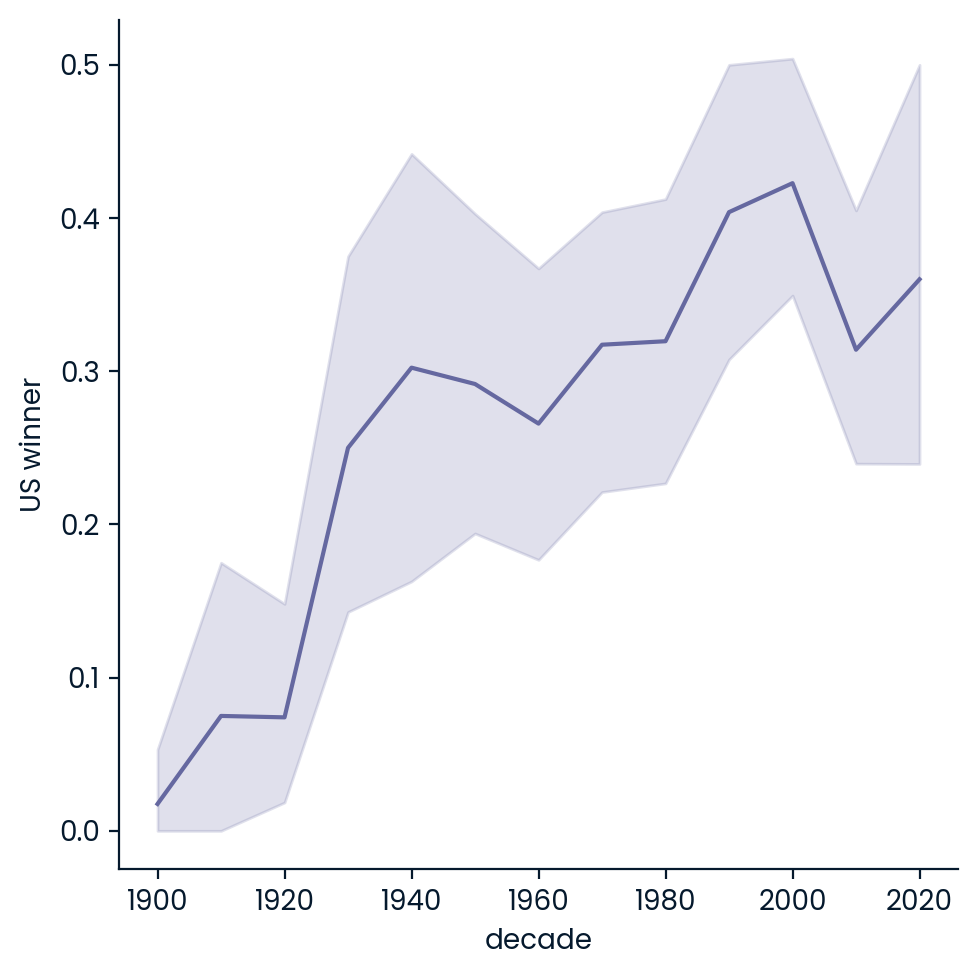

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998     True
999     True
Name: female_winner, Length: 1000, dtype: bool
    decade    category  female_winner
0     1900   Chemistry       0.000000
1     1900  Literature       0.100000
2     1900    Medicine       0.000000
3     1900       Peace       0.071429
4     1900     Physics       0.076923
..     ...         ...            ...
67    2020   Economics       0.111111
68    2020  Literature       0.500000
69    2020    Medicine       0.125000
70    2020       Peace       0.285714
71    2020     Physics       0.166667

[72 rows x 3 columns]
    decade    category
68    2020  Literature
{2020: 'Literature'}


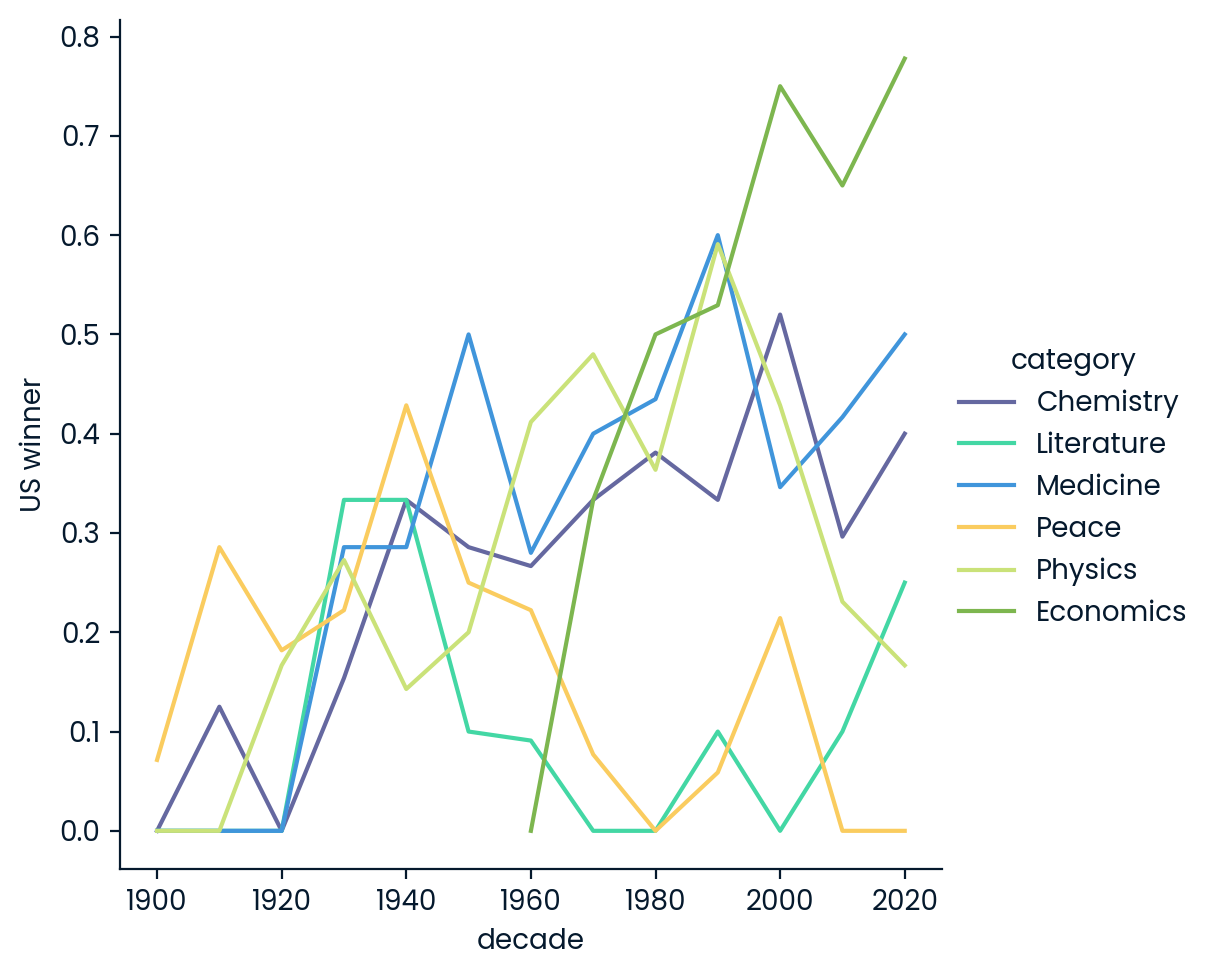

     year    category  ... decade female_winner
19   1903     Physics  ...   1900          True
29   1905       Peace  ...   1900          True
51   1909  Literature  ...   1900          True
62   1911   Chemistry  ...   1910          True
128  1926  Literature  ...   1920          True
..    ...         ...  ...    ...           ...
982  2022  Literature  ...   2020          True
989  2023    Medicine  ...   2020          True
993  2023     Physics  ...   2020          True
998  2023       Peace  ...   2020          True
999  2023   Economics  ...   2020          True

[65 rows x 21 columns]
    year category  ... decade female_winner
19  1903  Physics  ...   1900          True

[1 rows x 21 columns]
Marie Curie, née Sklodowska
Physics
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                   

In [16]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel_prize_data = pd.read_csv("data/nobel.csv")
print(nobel_prize_data)
print(nobel_prize_data["category"])

#What is the most commonly awarded gender and birth country?

nobel_group_gender = nobel_prize_data["category"].value_counts(ascending=False)
#print(nobel_group_gender)
nobel_group_gender = nobel_group_gender.reset_index()
print(nobel_group_gender)

top_gender =str(nobel_prize_data['sex'].value_counts().index[0])
print(top_gender)

#print(nobel_prize_data.columns)
nobel_group_country = nobel_prize_data["birth_country"].value_counts(ascending=False)
#print(nobel_group_country)
nobel_group_country = nobel_group_country.reset_index()
print(nobel_group_country)

top_country = str(nobel_prize_data["birth_country"].value_counts().index[0])
print(top_country)


#Which decade had the highest ratio of US-born Nobel prize winners to total winners in all categories?

nobel_prize_data["US winner"] = nobel_prize_data["birth_country"] == "United States of America"
print(nobel_prize_data["US winner"])


x = nobel_prize_data["year"]/10
nobel_prize_data["decade"] = (np.floor(x) * 10).astype(int)
print(nobel_prize_data["decade"])

group_by_decade = nobel_prize_data.groupby("decade",as_index=False)["US winner"].mean()

max_decade_usa = group_by_decade[group_by_decade["US winner"] == group_by_decade["US winner"].max()]['decade'].values[0]
print(max_decade_usa)

sns.relplot(x="decade", y ="US winner",kind="line",data=nobel_prize_data)
plt.show()

                                                                
#Which decade and Nobel Prize combination had the highest proportion of female laureates?

nobel_prize_data["female_winner"]=nobel_prize_data["sex"]=="Female"
print(nobel_prize_data["female_winner"])

combination= nobel_prize_data.groupby(["decade","category"],as_index=False)["female_winner"].mean()
print(combination)

max_row = combination[combination["female_winner"]==combination["female_winner"].max()][["decade","category"]]
print(max_row)

max_female_dict = {max_row["decade"].values[0]:max_row["category"].values[0]}
print(max_female_dict)

sns.relplot(x="decade", y ="US winner",kind="line",data=nobel_prize_data,hue="category", ci=None)
plt.show()


#Who was the first woman to receive a Nobel prize, and in what category?

nobel_prize_women = nobel_prize_data[nobel_prize_data["female_winner"]]
print(nobel_prize_women)

min_row=nobel_prize_women[nobel_prize_women["year"]==nobel_prize_women["year"].min()]
print(min_row)

first_woman_name = str(min_row["full_name"].values[0])
first_woman_category = str(min_row["category"].values[0])

print(first_woman_name)
print(first_woman_category)

#Which individuals or organizations have won more than one Nobel Prize throughout the years?

count_by_name = nobel_prize_data["full_name"].value_counts(ascending=False)
print(count_by_name)

repeat_list= count_by_name[count_by_name>=2].index.tolist()
print(repeat_list)



